In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core


!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15359, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15359 (delta 31), reused 43 (delta 16), pack-reused 15275
Receiving objects: 100% (15359/15359), 6.23 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (11142/11142), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
  P

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

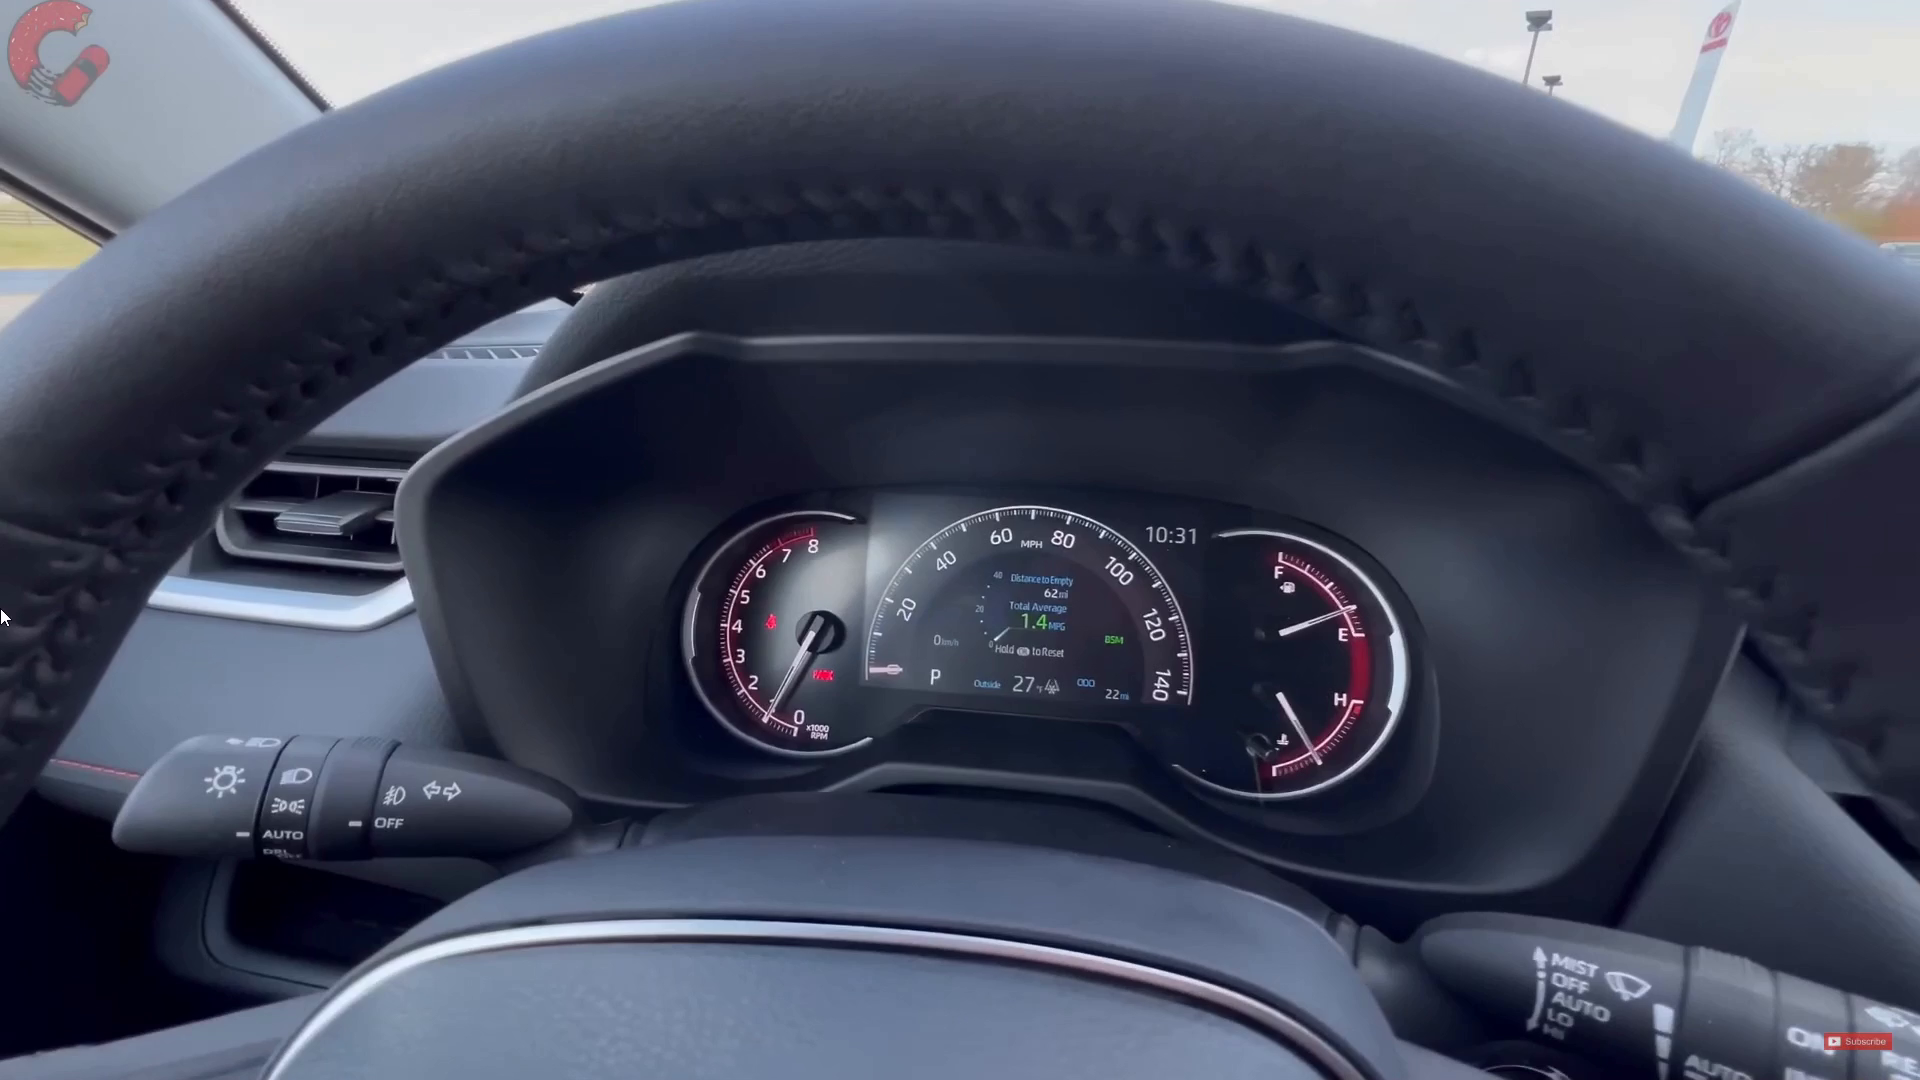

In [ ]:
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/1.png")
cv2_imshow(im)

In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[03/03 15:07:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:02, 61.6MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 2,  2, 74], device='cuda:0')
Boxes(tensor([[   0.0000,    0.0000, 1920.0000, 1038.5623],
        [ 167.9517,  820.9561, 1522.1460, 1063.5634],
        [1179.3599,  498.2883, 1431.3326,  827.5601]], device='cuda:0'))


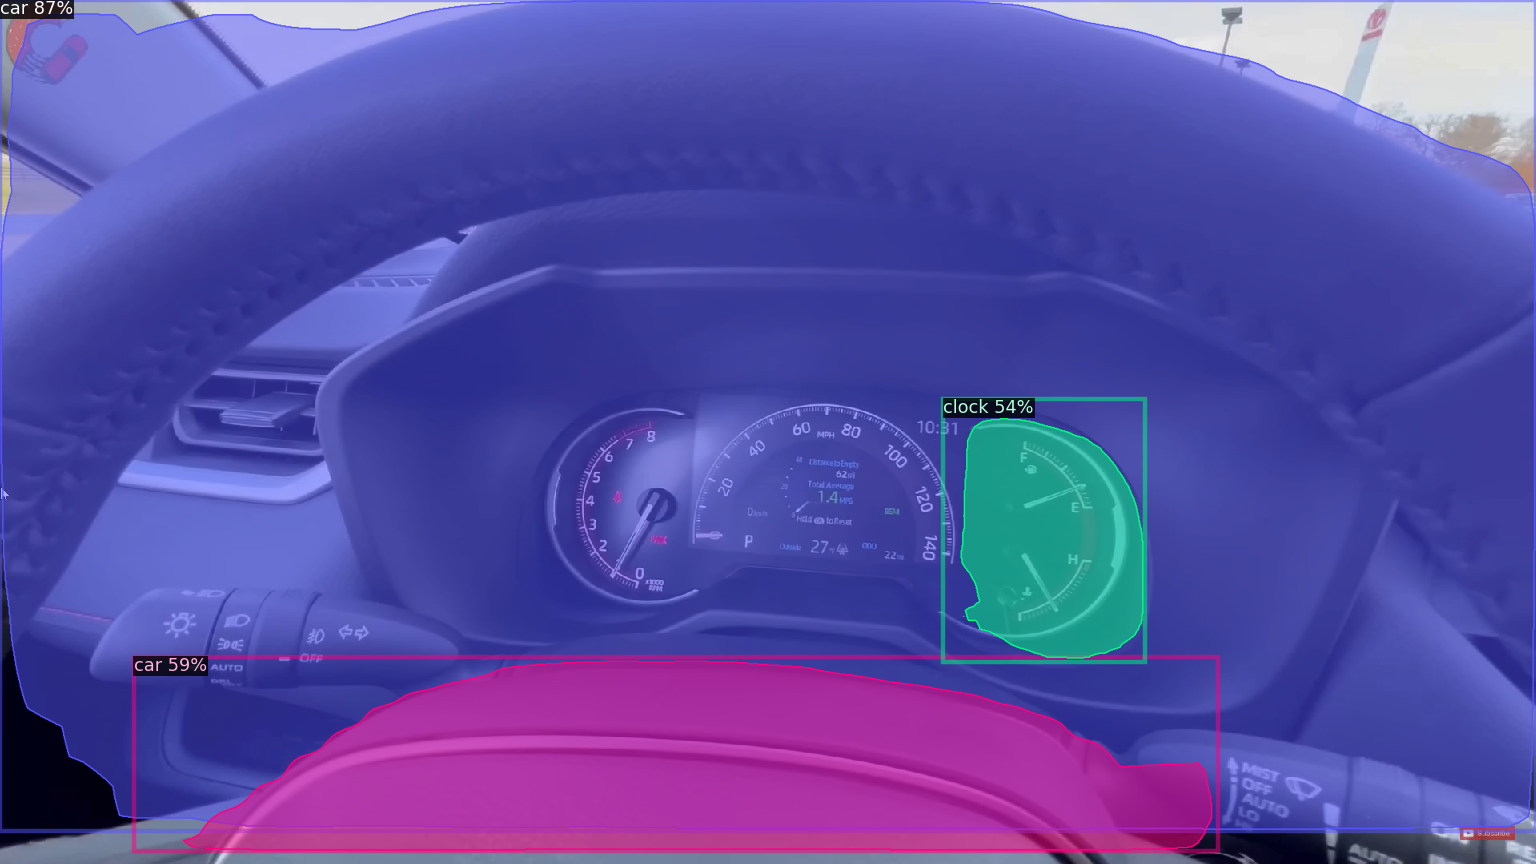

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.data.datasets import register_coco_instances

In [ ]:
register_coco_instances("my_train_dataset", {}, "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/labels_display-meter_coco_train.json", "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train")
register_coco_instances("my_val_dataset", {}, "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json", "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val")

In [ ]:
train_metadata = MetadataCatalog.get("my_train_dataset")
train_dataset_dicts = DatasetCatalog.get("my_train_dataset")

[03/03 15:08:58 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/labels_display-meter_coco_train.json


In [ ]:
val_metadata = MetadataCatalog.get("my_val_dataset")
val_dataset_dicts = DatasetCatalog.get("my_val_dataset")

[03/03 15:09:01 d2.data.datasets.coco]: Loaded 3 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json


In [ ]:
import matplotlib.pyplot as plt

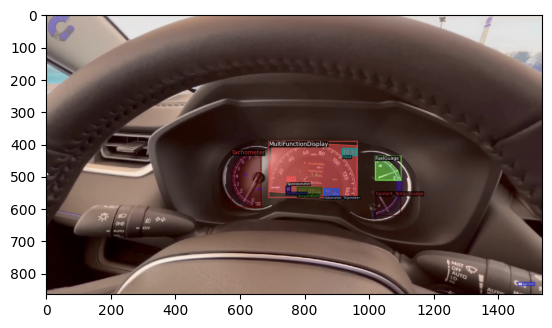

In [ ]:
for d in random.sample(train_dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.8)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/models/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_train_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.0005  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 1000 iterations seems good enough for this dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512  # Default is 512, using 256 for this dataset.
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9  # We have 9 classes.
# NOTE: this config means the number of classes, without the background. Do not use num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) #Create an instance of of DefaultTrainer with the given congiguration
trainer.resume_or_load(resume=False) #Load a pretrained model if available (resume training) or start training from scratch if no pretrained model is available

[03/03 15:10:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


In [ ]:
trainer.train()

[03/03 15:10:16 d2.engine.train_loop]: Starting training from iteration 0
[03/03 15:10:25 d2.utils.events]:  eta: 0:04:52  iter: 19  total_loss: 5.697  loss_cls: 2.554  loss_box_reg: 0.1521  loss_mask: 0.692  loss_rpn_cls: 2.094  loss_rpn_loc: 0.2058    time: 0.2962  last_time: 0.4194  data_time: 0.0232  last_data_time: 0.0120   lr: 9.9905e-06  max_mem: 1686M
[03/03 15:10:33 d2.utils.events]:  eta: 0:04:39  iter: 39  total_loss: 3.439  loss_cls: 2.191  loss_box_reg: 0.3098  loss_mask: 0.6911  loss_rpn_cls: 0.1333  loss_rpn_loc: 0.1042    time: 0.2881  last_time: 0.2597  data_time: 0.0038  last_data_time: 0.0032   lr: 1.998e-05  max_mem: 1687M
[03/03 15:10:39 d2.utils.events]:  eta: 0:04:37  iter: 59  total_loss: 2.745  loss_cls: 1.484  loss_box_reg: 0.4061  loss_mask: 0.6878  loss_rpn_cls: 0.04862  loss_rpn_loc: 0.1034    time: 0.2960  last_time: 0.2765  data_time: 0.0078  last_data_time: 0.0035   lr: 2.997e-05  max_mem: 1687M
[03/03 15:10:46 d2.utils.events]:  eta: 0:04:36  iter: 79  

In [ ]:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
import yaml
# Save the configuration to a config.yaml file
# Save the configuration to a config.yaml file
config_yaml_path = "/content/drive/MyDrive/Colab Notebooks/models/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[03/03 15:17:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/ColabNotebooks/models/Detectron2_Models/model_final.pth ...


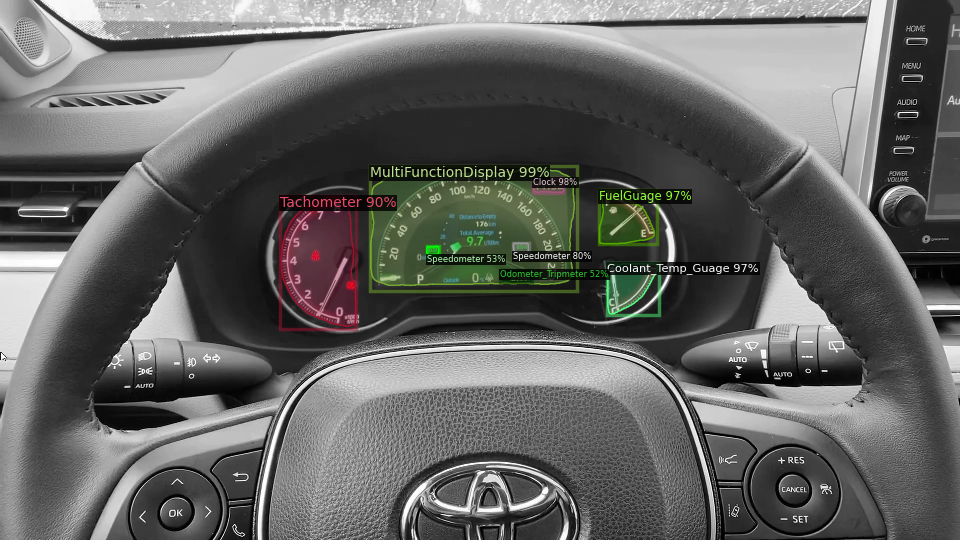

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):    #select number of images for display
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_val_dataset", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_val_dataset")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[03/03 15:19:41 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[03/03 15:19:41 d2.data.datasets.coco]: Loaded 3 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json
[03/03 15:19:41 d2.data.build]: Distribution of instances among all 9 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|  Speedometer  | 3            |     Clock     | 3            | Odometer_Tr.. | 3            |
|  Tachometer   | 3            |  Temperature  | 3            |   FuelGuage   | 3            |
| ShiftPosition | 3            | MultiFuncti.. | 3            | Coolant_Tem.. | 3            |
|               |              |               |              |               |              |
|     total     | 27           |               |              